In [29]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

df = pd.read_csv('df.csv')

df.head()



,gen,fitness,recall,auc,layers,classif_threshold,lr,batch_size,architecture
0,0,0.868593,0.903361,0.833825,21,0.25,0.001,32,"[32.25, 0.001, 16.1, 0.1, -1.0, 32.2, 0.0, -1...."
1,0,0.784801,0.778711,0.790890,15,0.50,0.100,16,"[16.5, 0.1, 64.1, 0.0, -1.0, 16.2, 0.05, -1.0,..."
2,0,0.807803,0.794818,0.820788,27,0.50,0.010,8,"[8.5, 0.01, 16.2, 0.1, -1.0, 16.1, 0.05, -1.0,..."
3,0,0.813274,0.808824,0.817725,24,0.50,0.010,8,"[8.5, 0.01, 16.4, 0.0, -1.0, 32.4, 0.05, -1.0,..."
4,0,0.787581,0.787115,0.788048,30,0.50,0.001,8,"[8.5, 0.001, 32.2, 0.1, -1.0, 64.1, 0.1, -1.0,..."


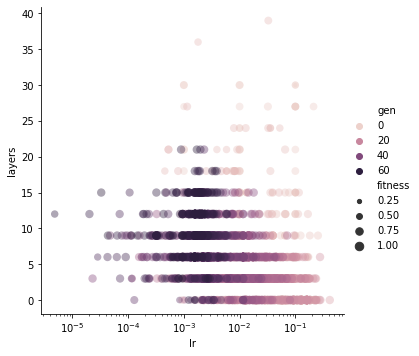

In [30]:
sns.relplot(data=df, y='layers', x='lr', hue='gen', 
            kind='scatter', size='fitness', alpha=0.4, edgecolor='none'
            )
plt.xscale('log')
#plt.savefig('out1.png')

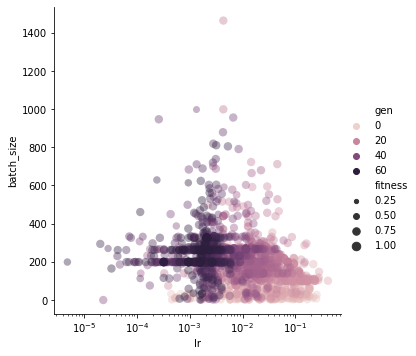

In [31]:
sns.relplot(data=df, y='batch_size', x='lr', hue='gen', 
            kind='scatter', size='fitness', alpha=0.4, edgecolor='none'
            )
plt.xscale('log')
#plt.savefig('out2.png')

Text(0.5, 0, 'gen')

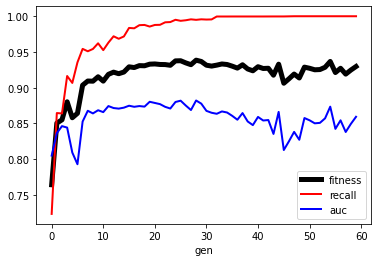

In [32]:
view = df.filter(['fitness', 'gen', 'auc', 'recall'])
view2 = pd.DataFrame(columns=view.columns)
for g in view['gen'].unique():
    d = {'gen': g}
    for c in view.columns:
        d[c] = view[view['gen'] == g][c].mean()
    view2 = view2.append(d, ignore_index=True)
        
plt.plot('gen', 'fitness', data=view2, color='black', linewidth=5)
plt.plot('gen', 'recall', data=view2, color='red', linewidth=2)
plt.plot('gen', 'auc', data=view2, color='blue', linewidth=2)
plt.legend()
plt.xlabel('gen')
#plt.savefig('out3.png')